___
___
## **Proyecto Integrador M5 - Avance 1.**

### **Comprensión y EDA**

Alumno: Ivan Martinez

Cohorte: DSFT01


___
___

### **Carga de datos**

In [99]:
# Importación de librerías para manipulación de datos (pandas) y visualización (matplotlib, seaborn).
from carga_datos import cargarDatos # importamos la funcion cargarDatos
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Configuración de estilo
sns.set(style="whitegrid") # para que los graficos tengan un estilo similar a excel

cargar la base de datos y convertir en un DF
df = cargarDatos()
df.head()
df.info()


identificar valores faltantes
(df.isnull().mean()*100).sort_values(ascending=False)
df['tendencia_ingresos'].unique

___
### **1. Exploración Inicial de Datos**

- Caracterización de tipos de datos
- Revisión de nulos
- Detección de duplicados


In [83]:
# Visualización de las primeras filas del DataFrame para familiarizarse con la estructura de los datos.
df.head() # Muestra las primeras 5 filas del DataFrame

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,2024-12-21 11:31:35,3692160.0,10,42,Independiente,8000000,2500000,341296,88.768094,...,0.0,51258.0,51258.0,0.0,5,0,0,908526.0,Estable,1
1,4,2025-04-22 09:47:35,840000.0,6,60,Empleado,3000000,2000000,124876,95.227787,...,0.0,8673.0,8673.0,0.0,0,0,2,939017.0,Creciente,1
2,9,2026-01-08 12:22:40,5974028.4,10,36,Independiente,4036000,829000,529554,47.613894,...,0.0,18702.0,18702.0,0.0,3,0,0,NaN,NaN,0
3,4,2025-08-04 12:04:10,1671240.0,6,48,Empleado,1524547,498000,252420,95.227787,...,0.0,15782.0,15782.0,0.0,3,0,0,1536193.0,Creciente,1
4,9,2025-04-26 11:24:26,2781636.0,11,44,Empleado,5000000,4000000,217037,95.227787,...,0.0,204804.0,204804.0,0.0,3,0,1,933473.0,Creciente,1


In [84]:
# Información general del DataFrame: revisión de tipos de datos y conteo de valores no nulos.
# Revisión de Tipos de Datos y Nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

In [85]:
# Conteo de valores nulos por cada columna para identificar faltantes.
print("Conteo de Nulos:")
print(df.isnull().sum())

Conteo de Nulos:
tipo_credito                        0
fecha_prestamo                      0
capital_prestado                    0
plazo_meses                         0
edad_cliente                        0
tipo_laboral                        0
salario_cliente                     0
total_otros_prestamos               0
cuota_pactada                       0
puntaje                             0
puntaje_datacredito                 6
cant_creditosvigentes               0
huella_consulta                     0
saldo_mora                        156
saldo_total                       156
saldo_principal                   405
saldo_mora_codeudor               590
creditos_sectorFinanciero           0
creditos_sectorCooperativo          0
creditos_sectorReal                 0
promedio_ingresos_datacredito    2930
tendencia_ingresos               2932
Pago_atiempo                        0
dtype: int64


In [86]:
# Cálculo del porcentaje de nulos para determinar el impacto de los datos faltantes.
print("Porcentaje de Nulos")
print(
    ((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False))

Porcentaje de Nulos
tendencia_ingresos               27.241475
promedio_ingresos_datacredito    27.222893
saldo_mora_codeudor               5.481743
saldo_principal                   3.762891
saldo_mora                        1.449410
saldo_total                       1.449410
puntaje_datacredito               0.055747
salario_cliente                   0.000000
tipo_laboral                      0.000000
edad_cliente                      0.000000
plazo_meses                       0.000000
capital_prestado                  0.000000
fecha_prestamo                    0.000000
tipo_credito                      0.000000
total_otros_prestamos             0.000000
cant_creditosvigentes             0.000000
huella_consulta                   0.000000
cuota_pactada                     0.000000
puntaje                           0.000000
creditos_sectorCooperativo        0.000000
creditos_sectorFinanciero         0.000000
creditos_sectorReal               0.000000
Pago_atiempo                      

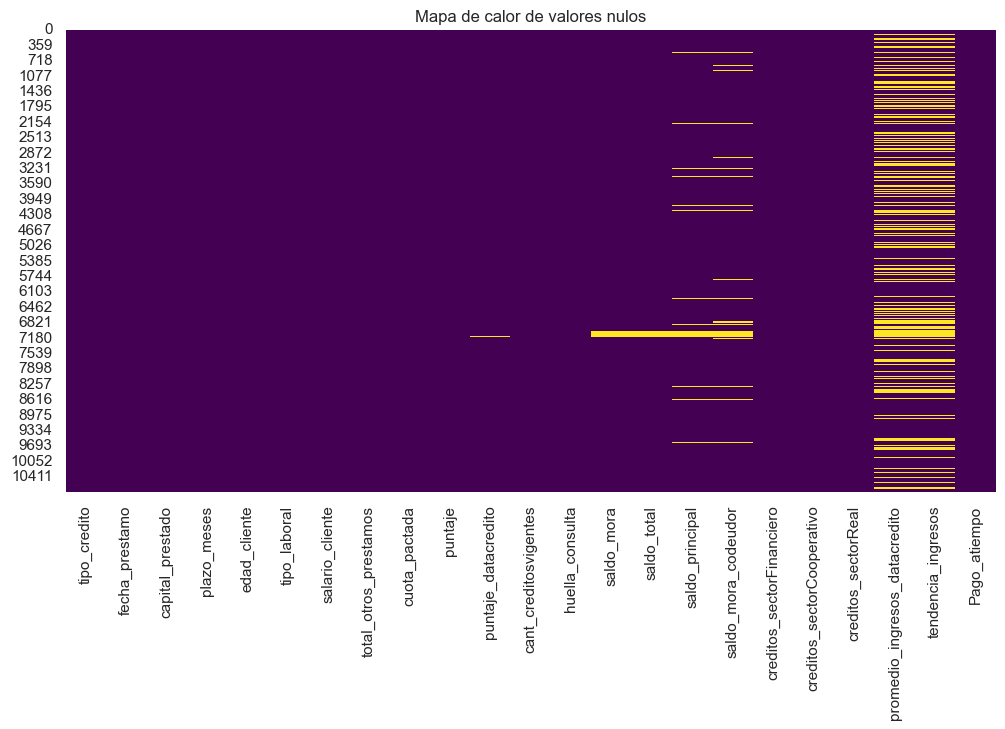

In [ ]:
# Visualización gráfica de la matriz de nulos (Mapa de calor) para identificar patrones de faltantes.
# Mapa de calor de nulos
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos') 
plt.show()  

In [88]:
# Verificación de filas duplicadas para asegurar la integridad de los datos.
# Detección de Duplicados
duplicados = df.duplicated().sum()
print(f"Filas duplicadas encontradas: {duplicados}")
if duplicados > 0:
    print("Muestra de duplicados:")
    display(df[df.duplicated(keep=False)].head())
    # df = df.drop_duplicates() # Descomentar para eliminar
else:
    print("No hay filas totalmente duplicadas.")

Filas duplicadas encontradas: 0
No hay filas totalmente duplicadas.


In [89]:
# Separación de variables en numéricas y categóricas para facilitar análisis específicos.
# Caracterización de Variables
variables_numericas = df.select_dtypes(include=['number']).columns.tolist()

variables_categoricas = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Asegurar que fecha_prestamo no esté en numéricas si se cargó como tal (aunque info dice datetime)

if 'fecha_prestamo' in variables_numericas:
    variables_numericas.remove('fecha_prestamo')

print(f"Variables Numéricas ({len(variables_numericas)}): {variables_numericas}")

print(f"Variables Categóricas ({len(variables_categoricas)}): {variables_categoricas}")


Variables Numéricas (20): ['tipo_credito', 'capital_prestado', 'plazo_meses', 'edad_cliente', 'salario_cliente', 'total_otros_prestamos', 'cuota_pactada', 'puntaje', 'puntaje_datacredito', 'cant_creditosvigentes', 'huella_consulta', 'saldo_mora', 'saldo_total', 'saldo_principal', 'saldo_mora_codeudor', 'creditos_sectorFinanciero', 'creditos_sectorCooperativo', 'creditos_sectorReal', 'promedio_ingresos_datacredito', 'Pago_atiempo']
Variables Categóricas (2): ['tipo_laboral', 'tendencia_ingresos']


___
### **2. Análisis Univariado || Exploración de datos y descripción (EDA)**


- Estadísticas descriptivas
- Distribuciones (Histogramas, Boxplots)
- Frecuencias para categóricas


In [ ]:
# Generación de estadísticas descriptivas (media, min, max, desviación) de las variables numéricas.
# Estadísticas Descriptivas Completas
print("Estadísticas Básicas")
display(df[variables_numericas].describe().T) # .T transpone el dataframe

Estadísticas Básicas


,count,mean,std,min,25%,50%,75%,max
tipo_credito,10763.0,5.411131e+00,2.338279e+00,4.00000,4.000000e+00,4.000000e+00,9.000000e+00,6.800000e+01
capital_prestado,10763.0,2.434315e+06,1.909643e+06,360000.00000,1.224831e+06,1.921920e+06,3.084840e+06,4.144415e+07
plazo_meses,10763.0,1.057558e+01,6.632082e+00,2.00000,6.000000e+00,1.000000e+01,1.200000e+01,9.000000e+01
edad_cliente,10763.0,4.394862e+01,1.506088e+01,19.00000,3.300000e+01,4.200000e+01,5.300000e+01,1.230000e+02
salario_cliente,10763.0,1.721643e+07,3.554767e+08,0.00000,2.000000e+06,3.000000e+06,4.875808e+06,2.200000e+10
total_otros_prestamos,10763.0,6.238870e+06,1.184183e+08,0.00000,5.000000e+05,1.000000e+06,2.000000e+06,6.787675e+09
cuota_pactada,10763.0,2.436174e+05,2.104937e+05,23944.00000,1.210415e+05,1.828630e+05,2.878335e+05,3.816752e+06
puntaje,10763.0,9.117004e+01,1.646544e+01,-38.00999,9.522779e+01,9.522779e+01,9.522779e+01,9.522779e+01
puntaje_datacredito,10757.0,7.807908e+02,1.048780e+02,-7.00000,7.570000e+02,7.910000e+02,8.250000e+02,9.990000e+02
cant_creditosvigentes,10763.0,5.726749e+00,3.977162e+00,0.00000,3.000000e+00,5.000000e+00,8.000000e+00,6.200000e+01


In [ ]:
# Cálculo de la Asimetría (Skewness) para detectar sesgos en la distribución de los datos.
print("Skewness (Asimetría) ")
print(df[variables_numericas].skew().sort_values(ascending=False)) # Imprime la skewness de las variables numéricas y las ordena de menor a mayor

Skewness (Asimetría) 
saldo_mora_codeudor              94.971504
salario_cliente                  43.776664
saldo_mora                       40.568483
total_otros_prestamos            38.463886
saldo_total                      20.197674
saldo_principal                   5.050172
promedio_ingresos_datacredito     4.280151
creditos_sectorCooperativo        4.218667
cuota_pactada                     3.793301
capital_prestado                  3.723884
creditos_sectorReal               3.164866
creditos_sectorFinanciero         2.703071
tipo_credito                      2.672074
plazo_meses                       2.459691
edad_cliente                      1.934399
cant_creditosvigentes             1.797738
huella_consulta                   1.487102
Pago_atiempo                     -4.256468
puntaje                          -4.865607
puntaje_datacredito              -5.644513
dtype: float64


In [92]:
# Cálculo de la Curtosis (Kurtosis) para identificar colas pesadas y posibles outliers.
print("Kurtosis (Curtosis)")
print(df[variables_numericas].kurt().sort_values(ascending=False))

Kurtosis (Curtosis)
saldo_mora_codeudor              9279.824860
salario_cliente                  2211.230120
saldo_mora                       1845.712807
total_otros_prestamos            1719.280871
saldo_total                       789.166702
saldo_principal                    51.063839
tipo_credito                       46.464260
puntaje_datacredito                39.437798
capital_prestado                   35.318092
promedio_ingresos_datacredito      32.770749
creditos_sectorCooperativo         29.351455
cuota_pactada                      26.650757
puntaje                            24.081011
creditos_sectorFinanciero          19.441771
creditos_sectorReal                18.187208
Pago_atiempo                       16.120512
cant_creditosvigentes               8.623346
edad_cliente                        7.868936
plazo_meses                         7.780121
huella_consulta                     3.998984
dtype: float64


___
### **Visualización Variables Numéricas**

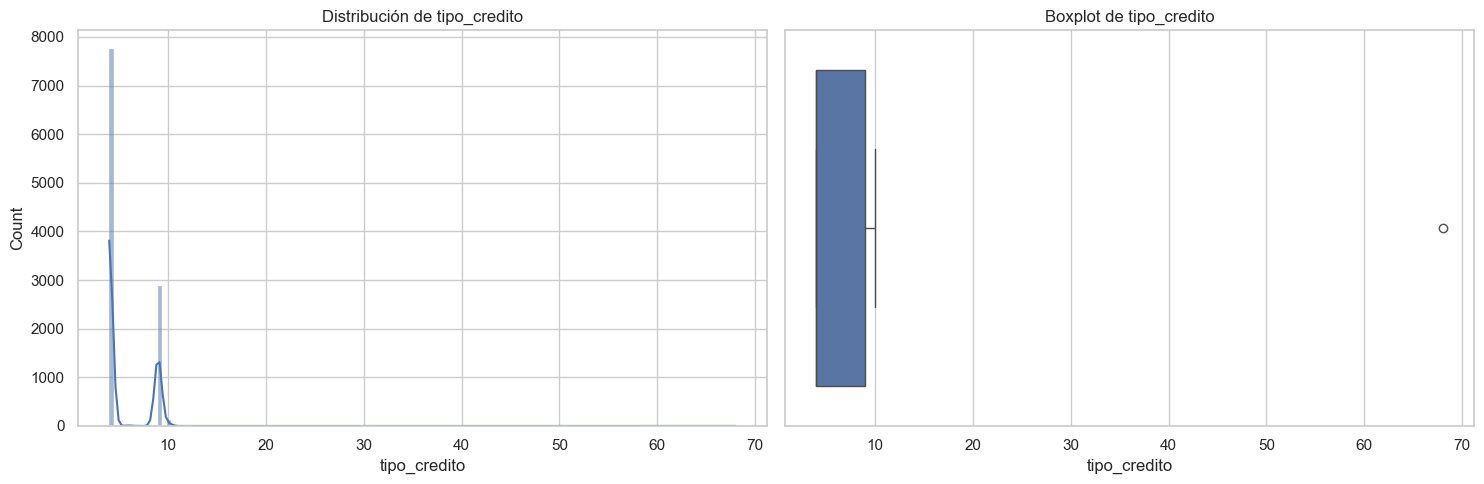

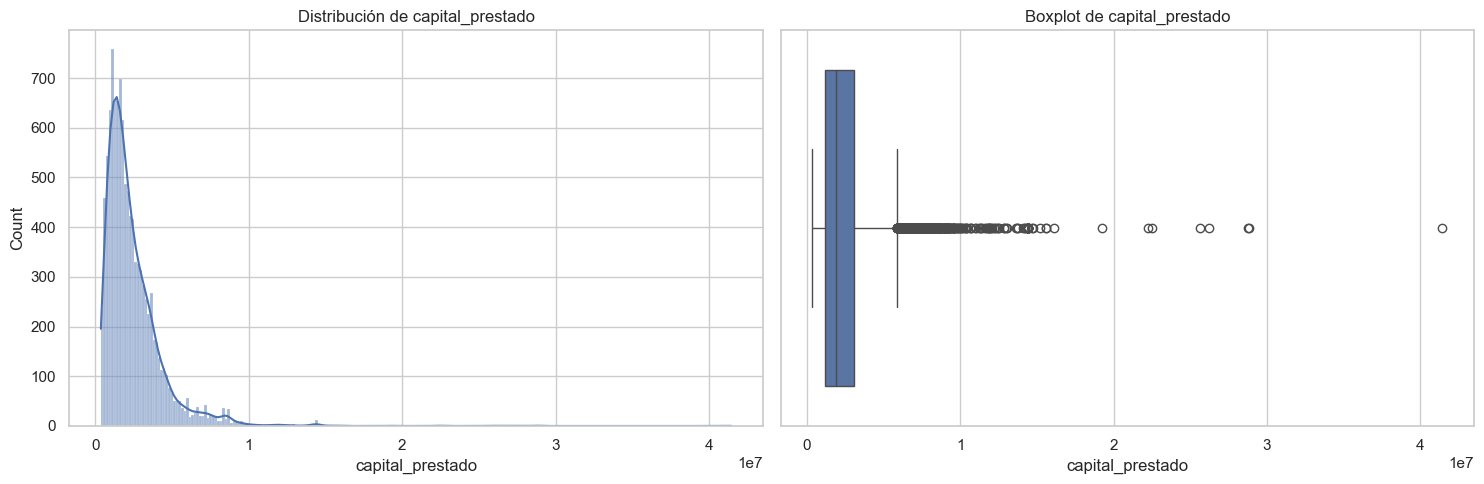

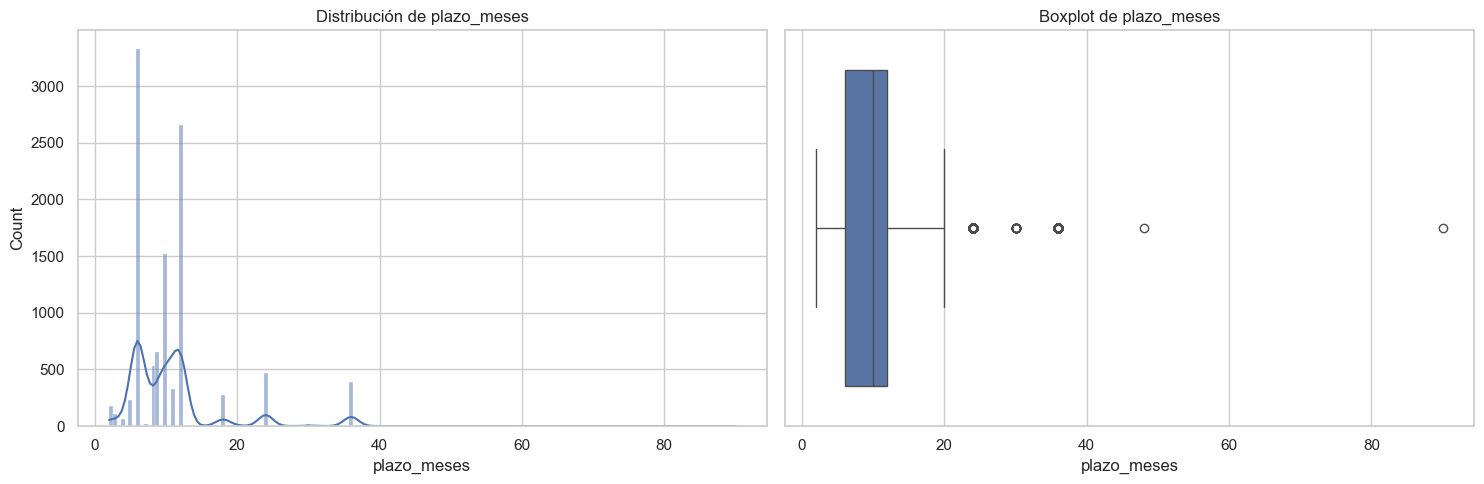

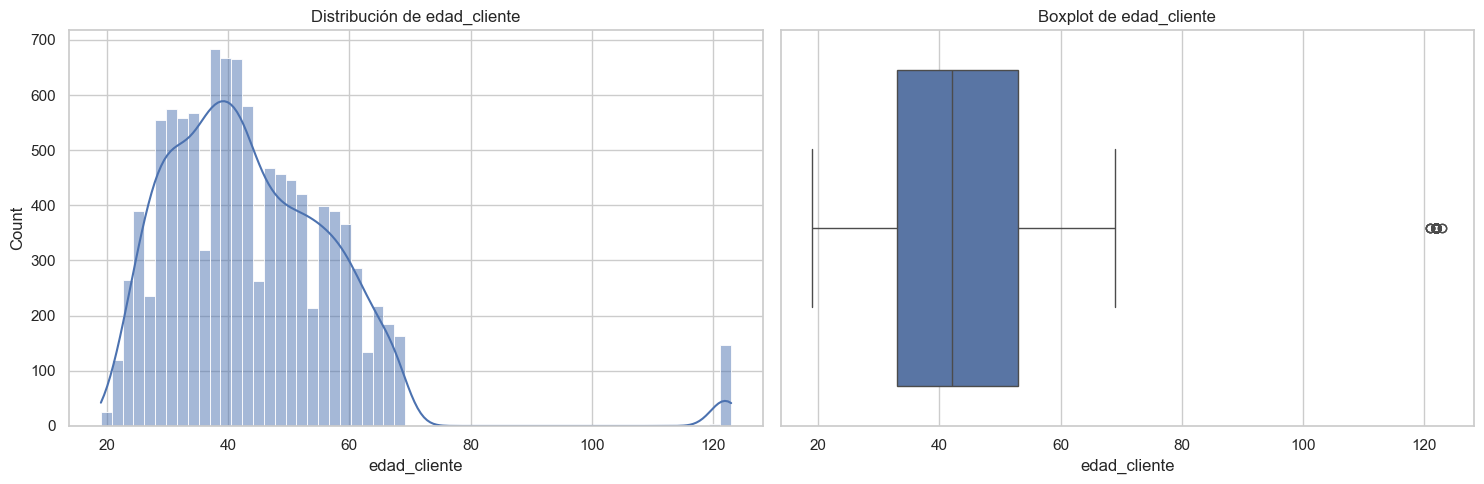

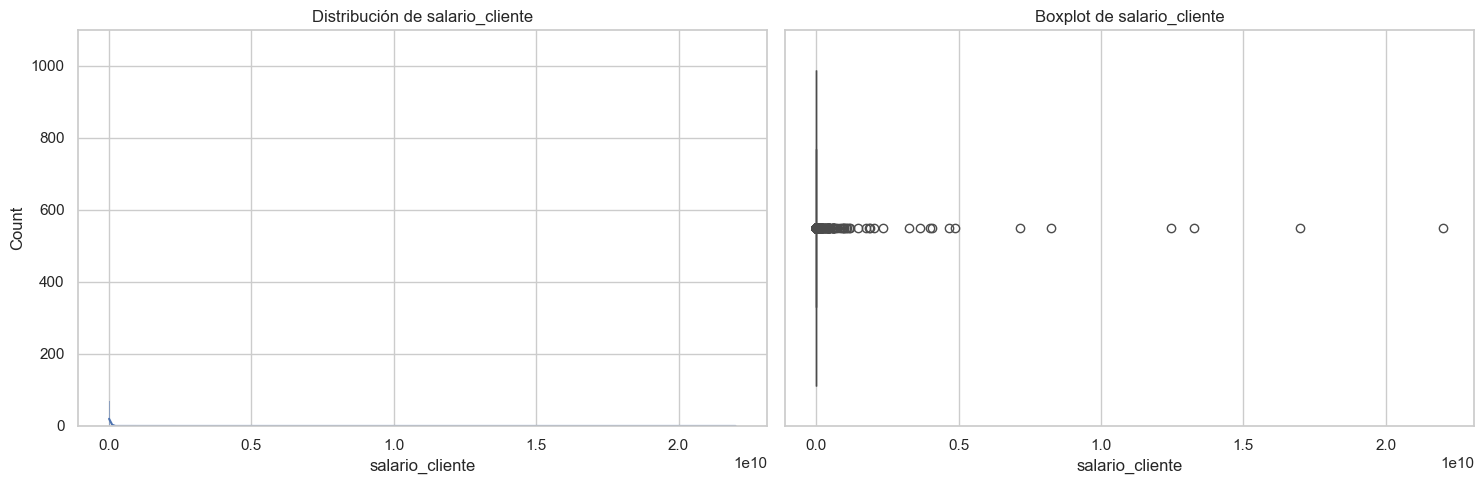

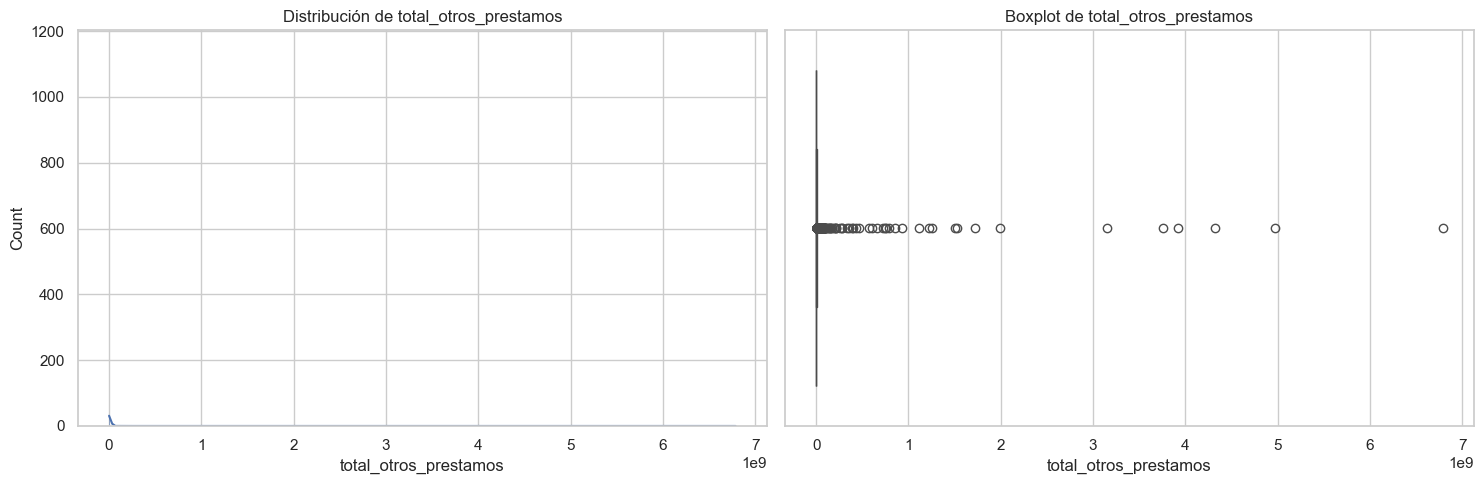

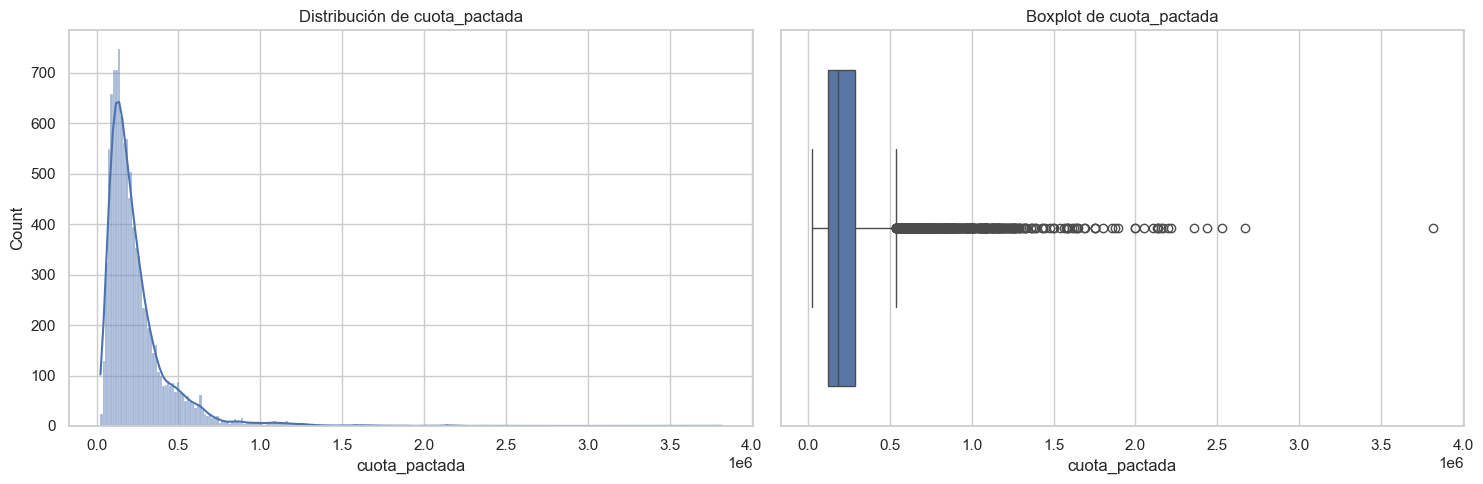

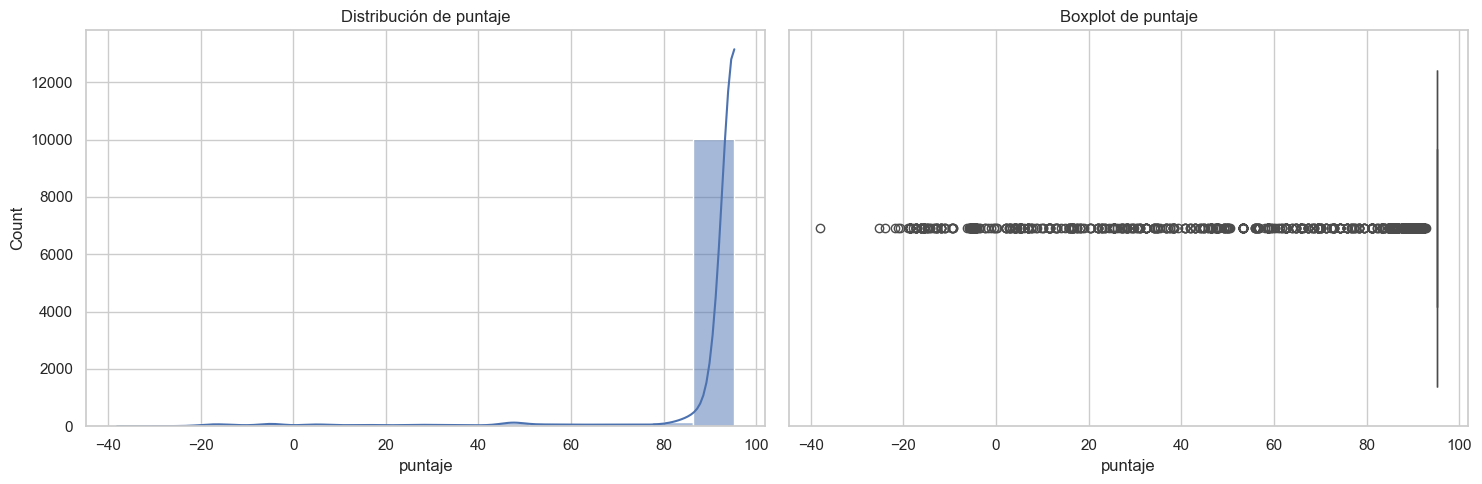

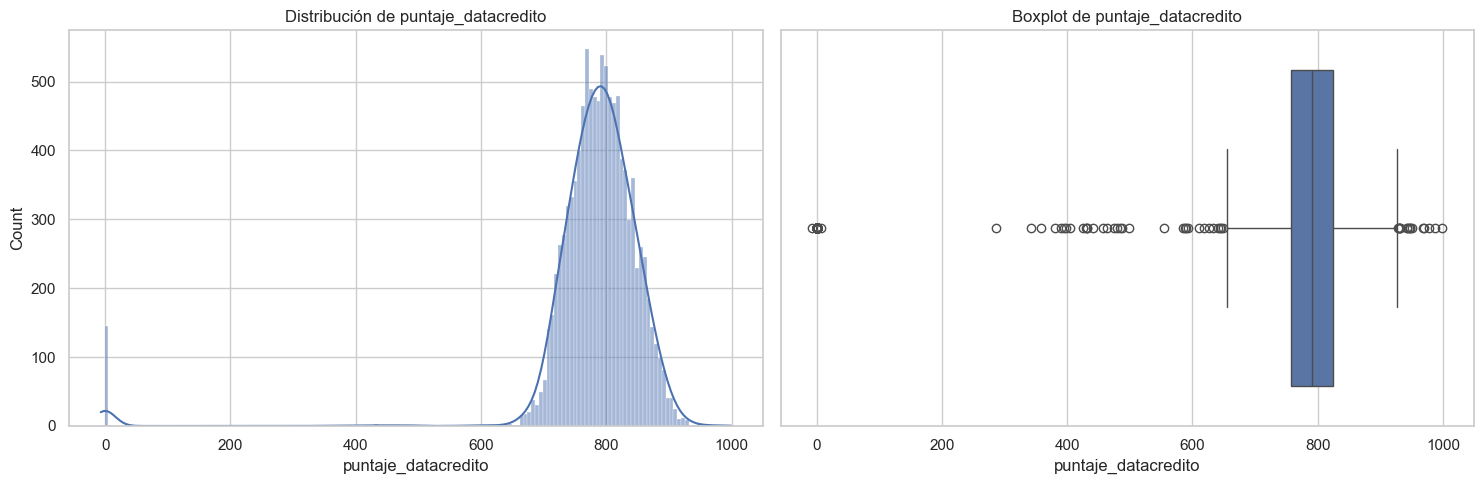

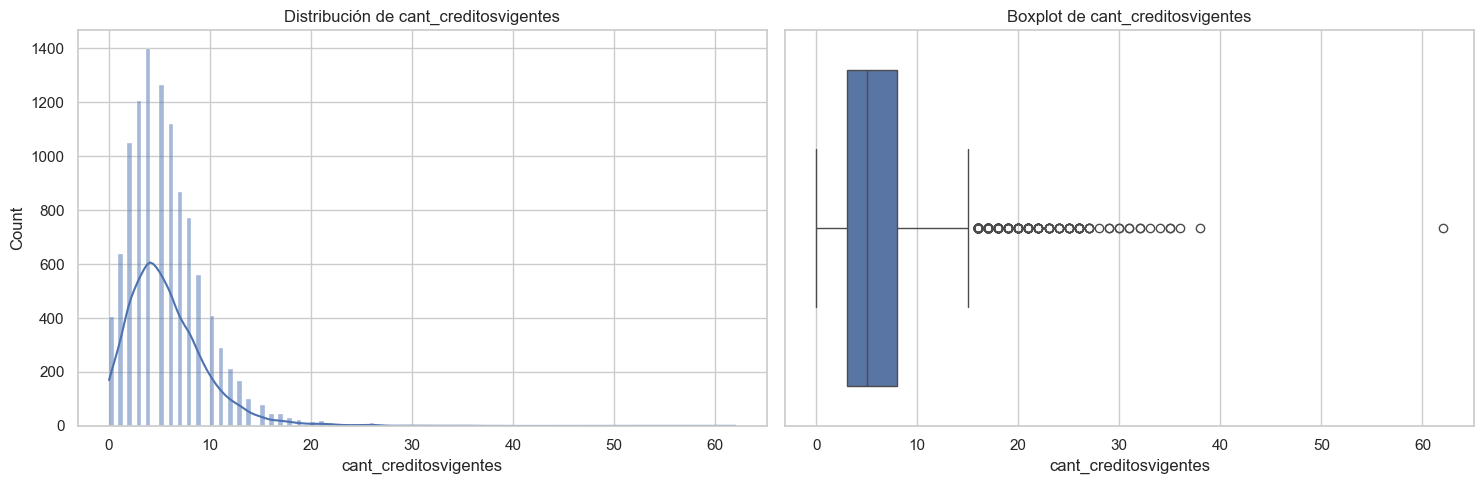

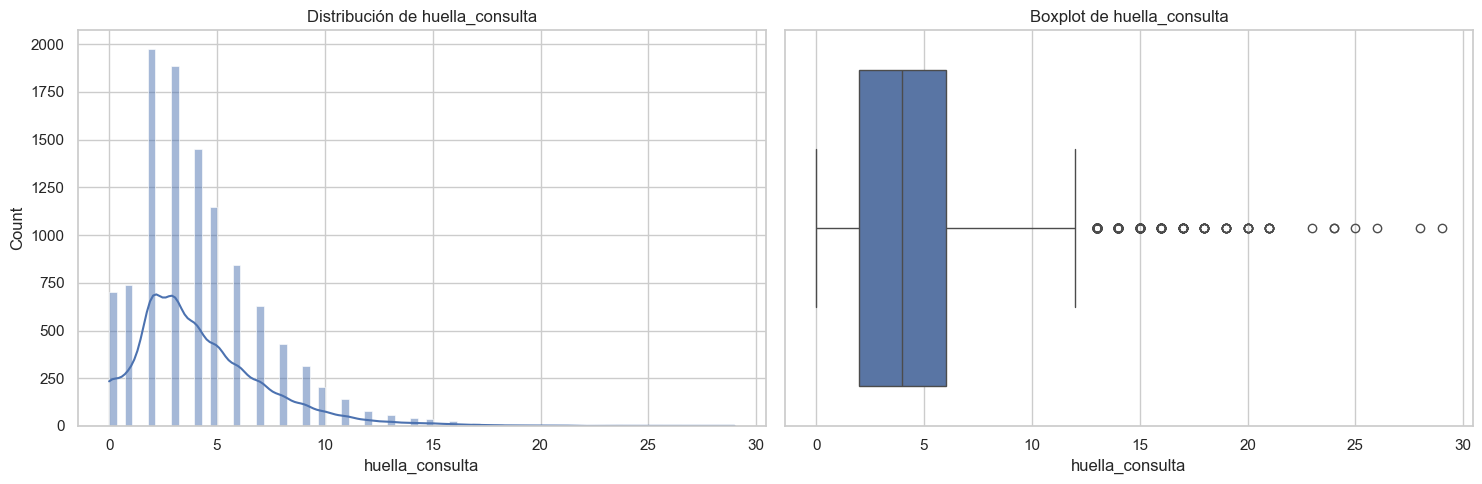

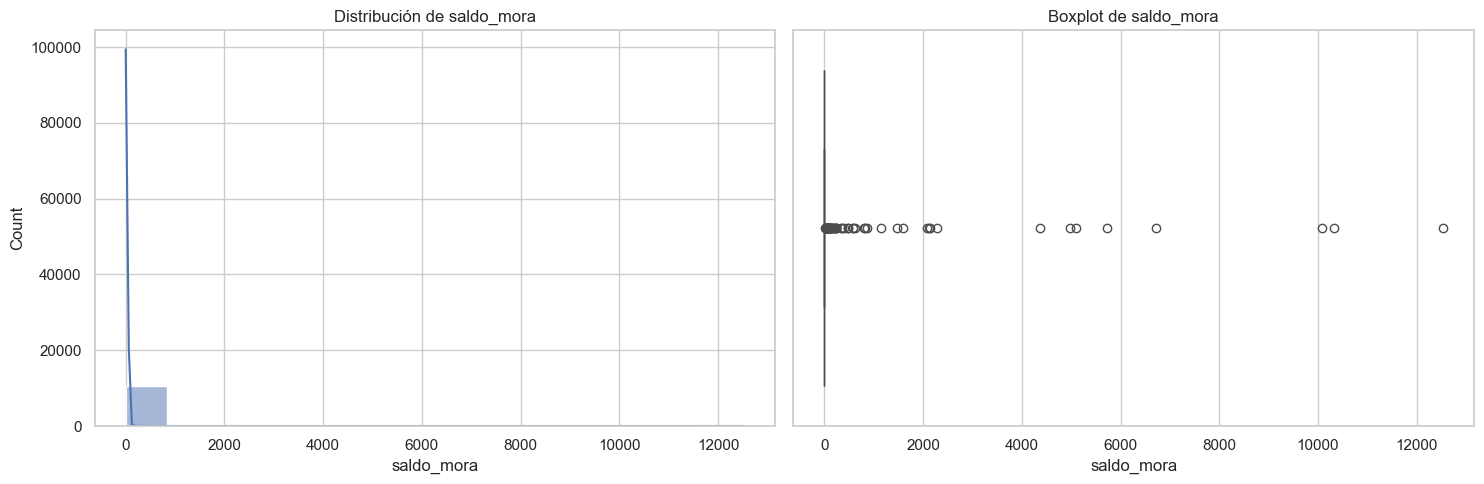

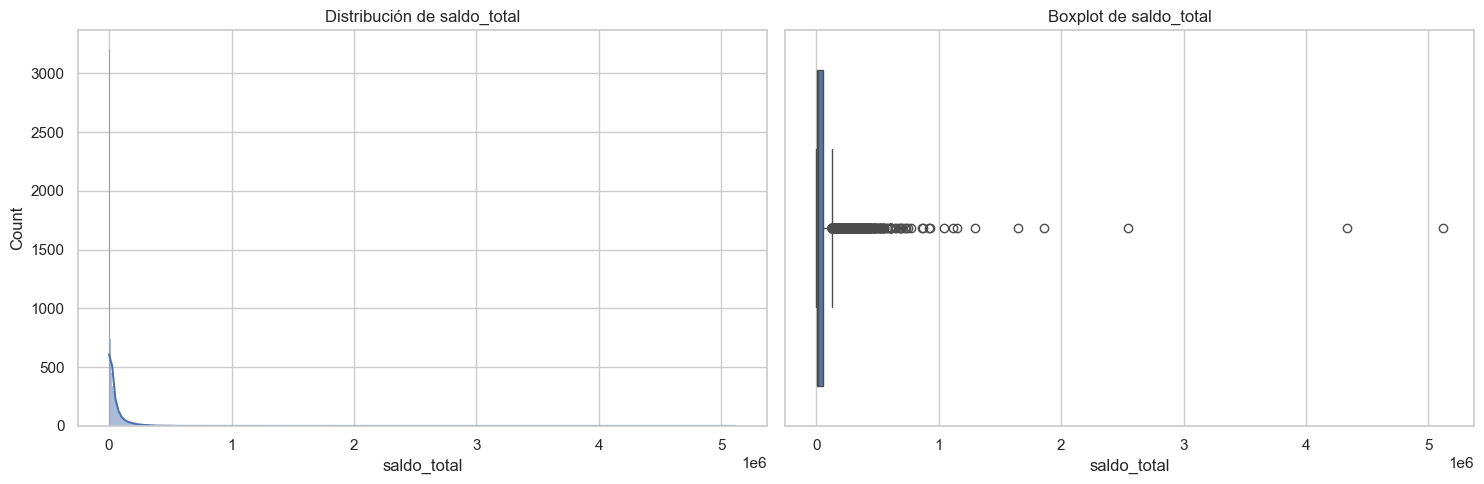

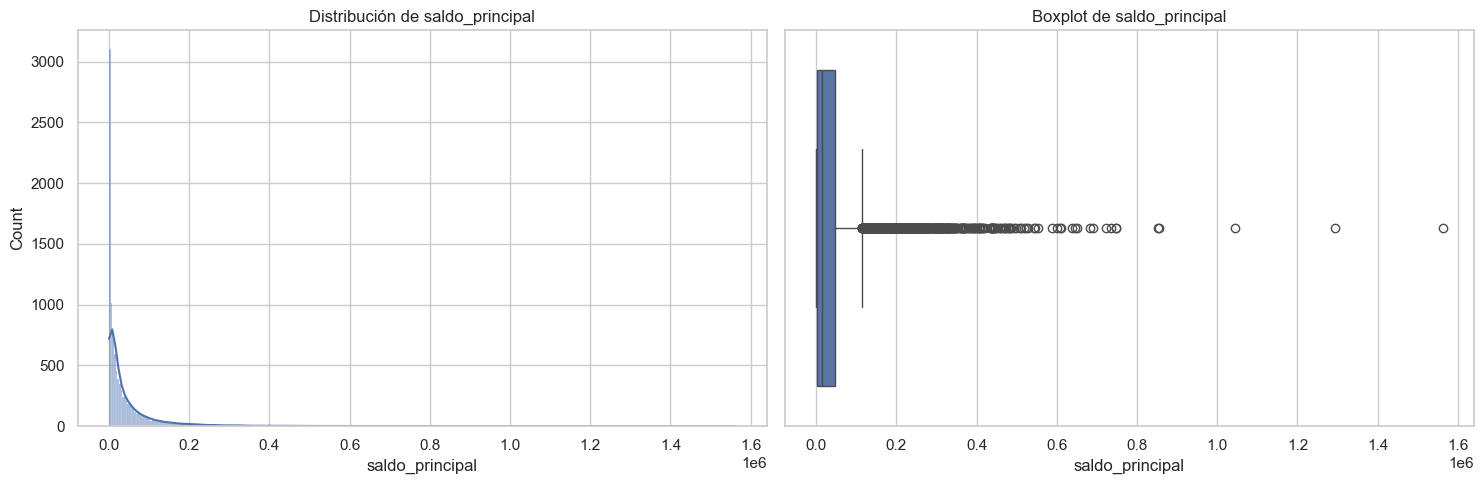

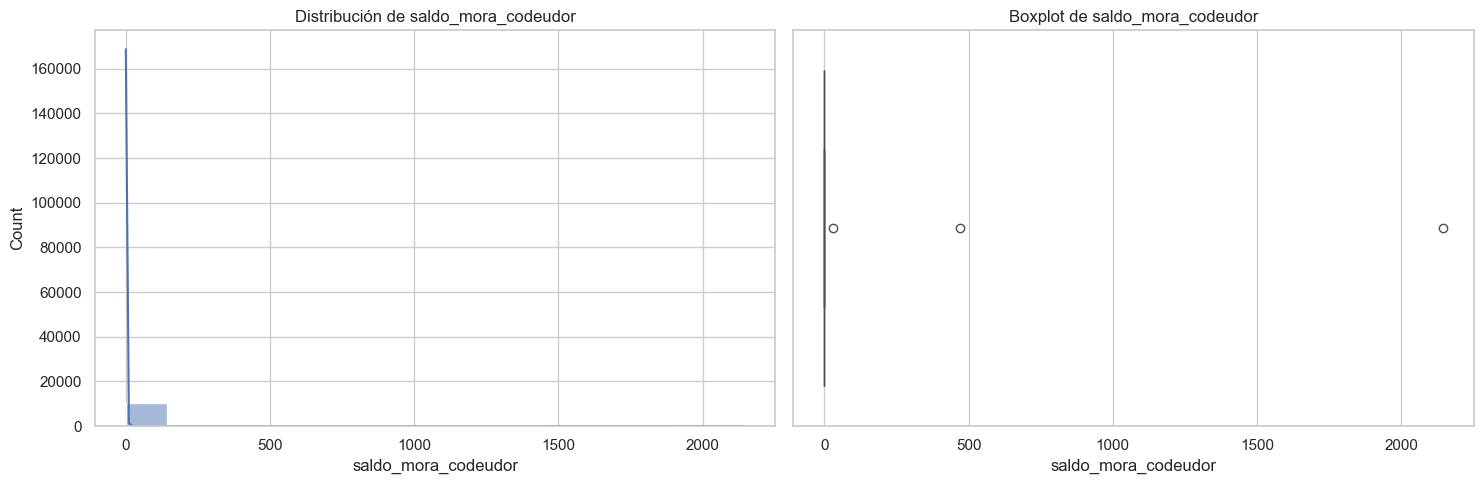

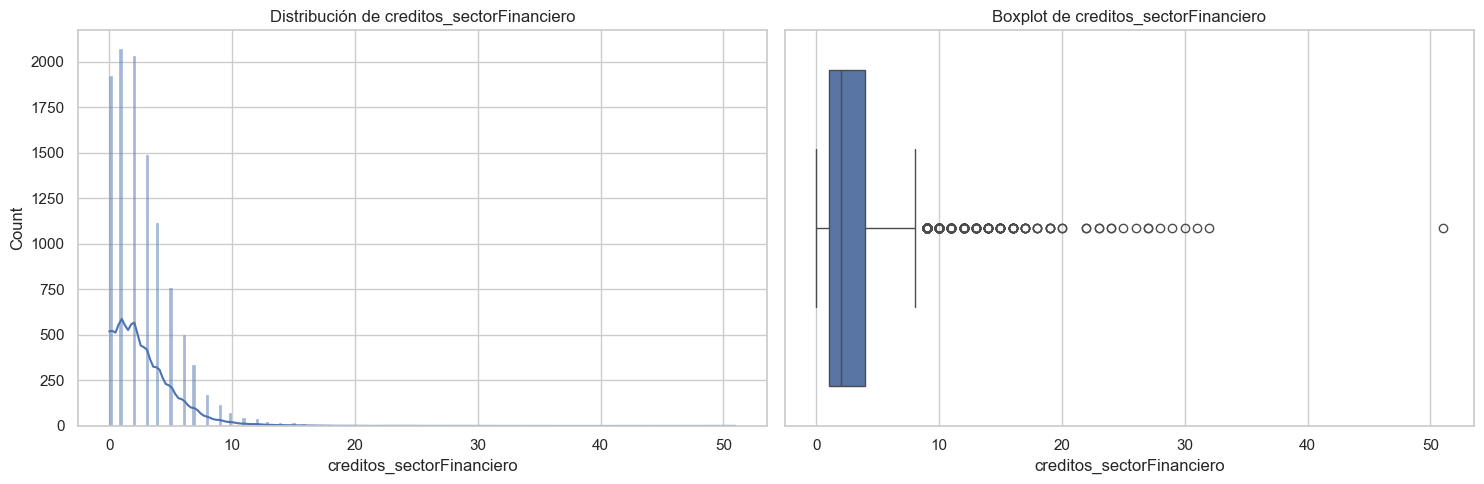

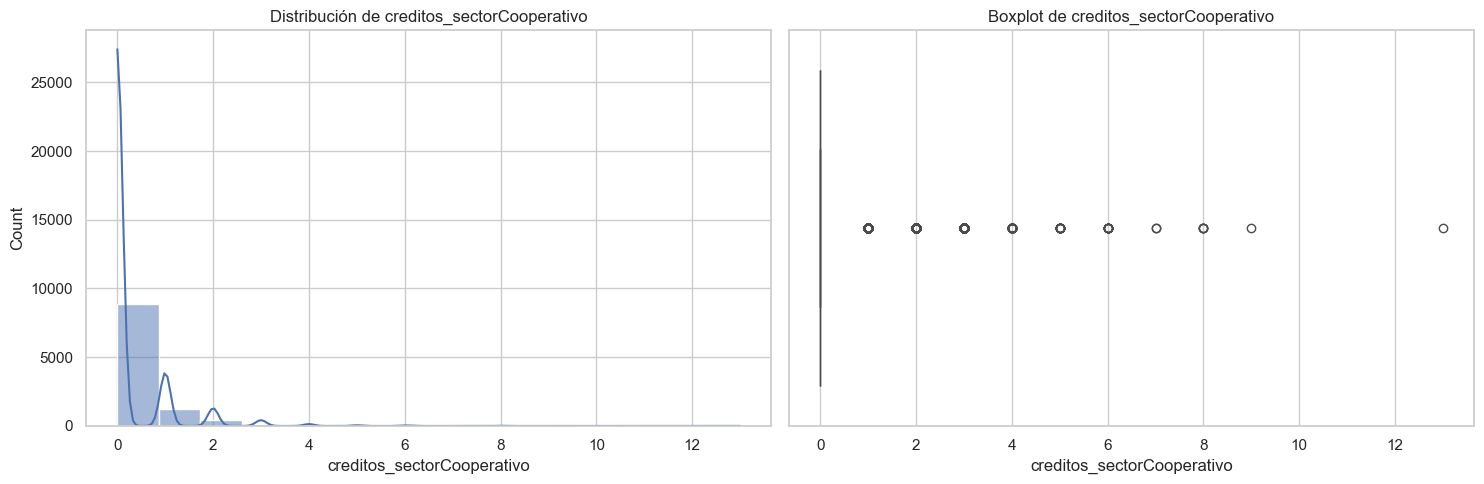

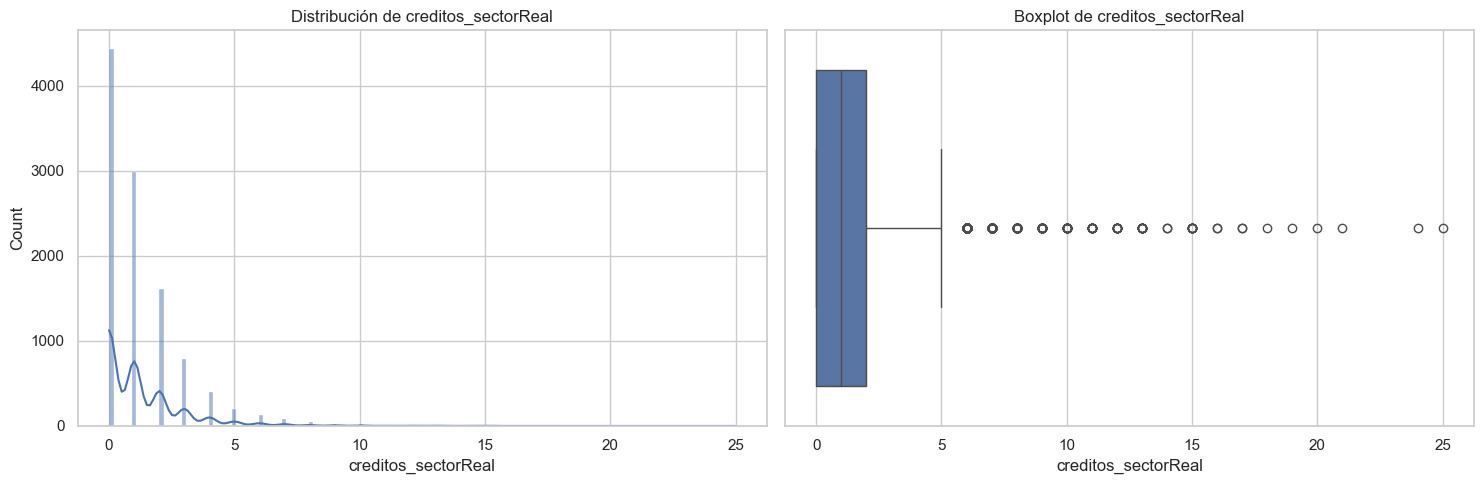

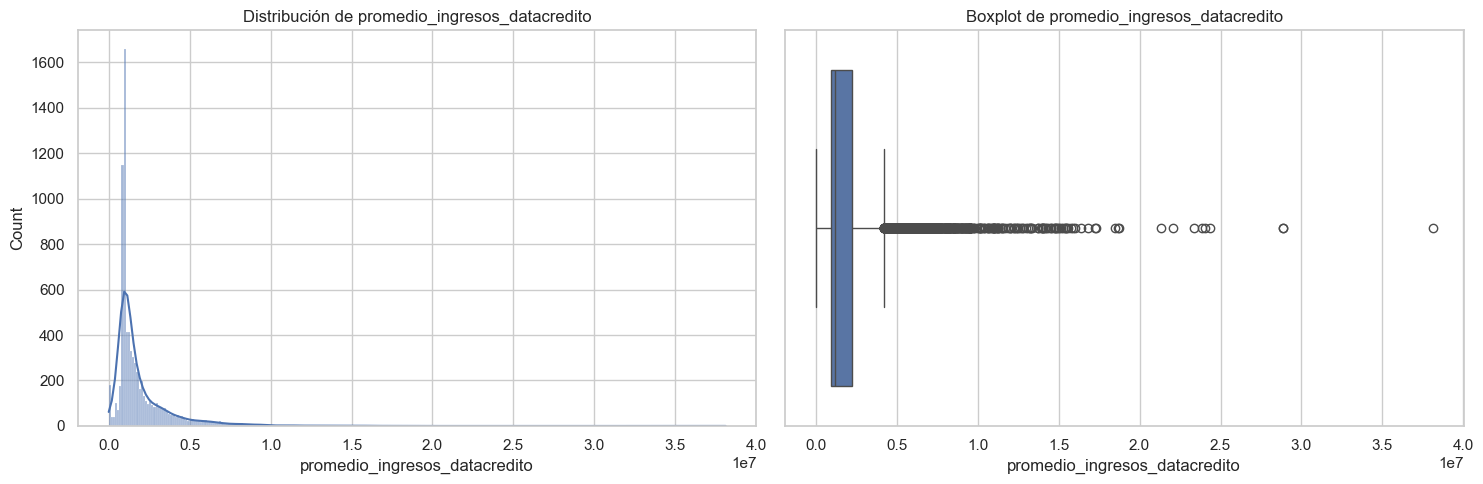

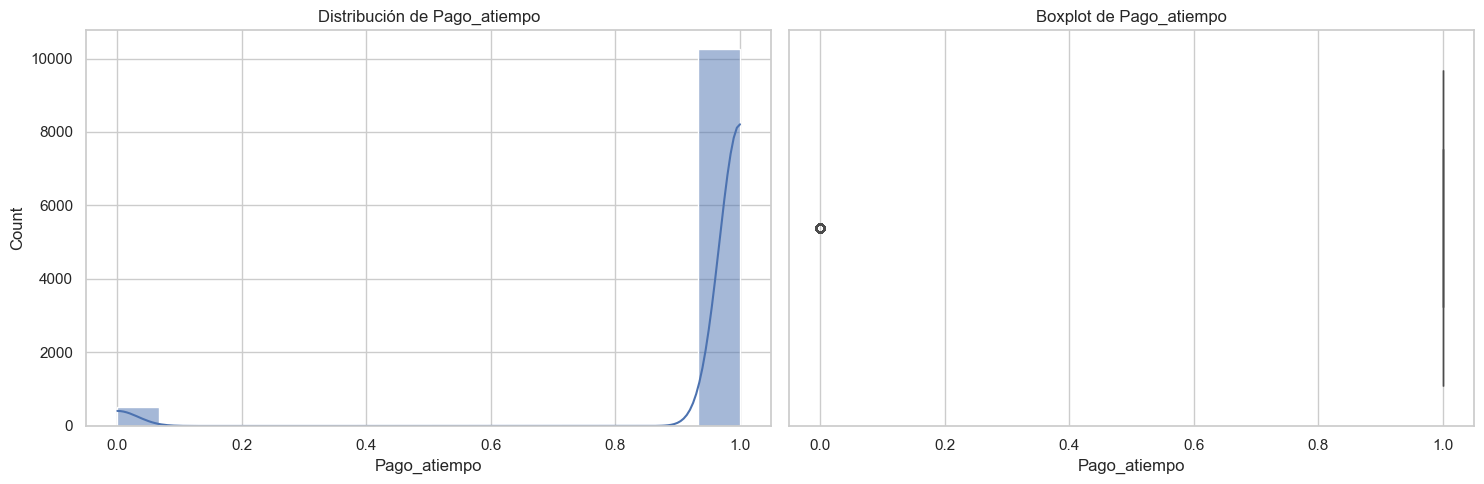

In [ ]:
# Creación de Histogramas y Boxplots para visualizar la distribución y detectar valores atípicos en variables numéricas.
# Generamos gráficos para cada variable numérica

for col in variables_numericas:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histograma con KDE
    sns.histplot(df[col].dropna(), kde=True, ax=axes[0])
    axes[0].set_title(f'Distribución de {col}')
    
    # Boxplot
    sns.boxplot(x=df[col].dropna(), ax=axes[1])
    axes[1].set_title(f'Boxplot de {col}')
    
    plt.tight_layout()

    plt.show()


___ 
### **Visualización Variables Categóricas**


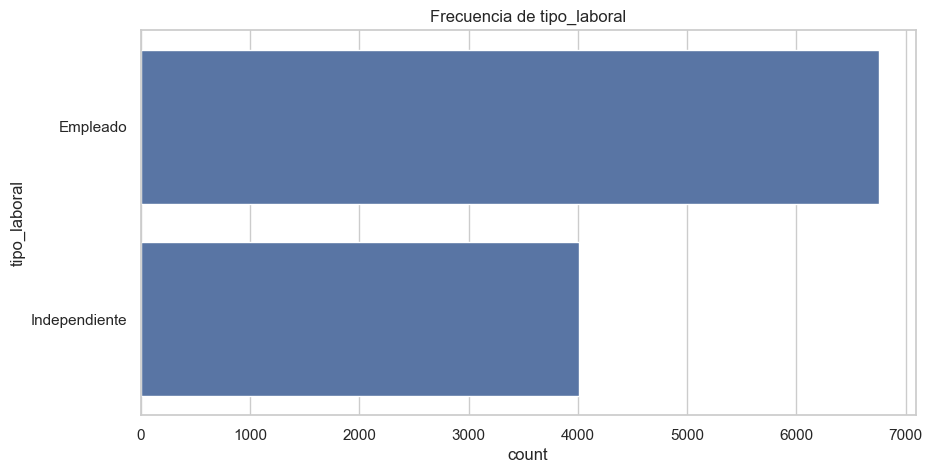

Distribución porcentual de tipo_laboral
tipo_laboral
Empleado         62.752021
Independiente    37.247979
Name: proportion, dtype: float64




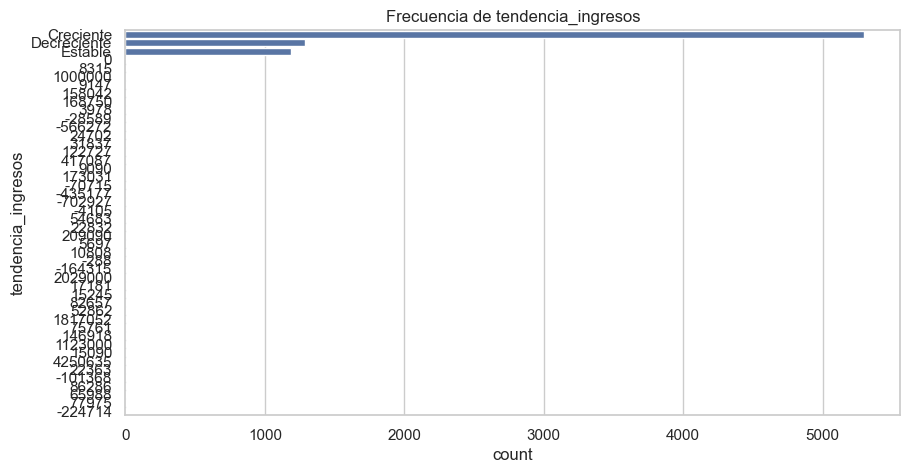

Distribución porcentual de tendencia_ingresos
tendencia_ingresos
Creciente      67.603116
Decreciente    16.485762
Estable        15.170476
0               0.089388
8315            0.076619
1000000         0.051079
9147            0.025540
158042          0.012770
168750          0.012770
3978            0.012770
-28589          0.012770
-566272         0.012770
24702           0.012770
31837           0.012770
122727          0.012770
417087          0.012770
9090            0.012770
173031          0.012770
-70715          0.012770
-435177         0.012770
-702927         0.012770
-4105           0.012770
54683           0.012770
22832           0.012770
209090          0.012770
5697            0.012770
10808           0.012770
-288            0.012770
-164315         0.012770
2029000         0.012770
17181           0.012770
15245           0.012770
82657           0.012770
52862           0.012770
1817052         0.012770
75761           0.012770
146918          0.012770
1123000   

In [94]:
# Gráficos de barras para analizar la frecuencia de categorías en variables cualitativas.
# Visualización Variables Categóricas

for col in variables_categoricas:
    if df[col].nunique() < 50: # Solo graficar si tiene pocas categorías únicas
        plt.figure(figsize=(10, 5))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Frecuencia de {col}')
        plt.show()
        
        print(f"Distribución porcentual de {col}")
        print(df[col].value_counts(normalize=True) * 100)
        print("\n")
    else:
        print(f"{col} tiene {df[col].nunique()} categorías únicas, se omite gráfico.")


___
### 3. Análisis Bivariado

- Relación con la variable objetivo `Pago_atiempo`
- Matriz de correlación


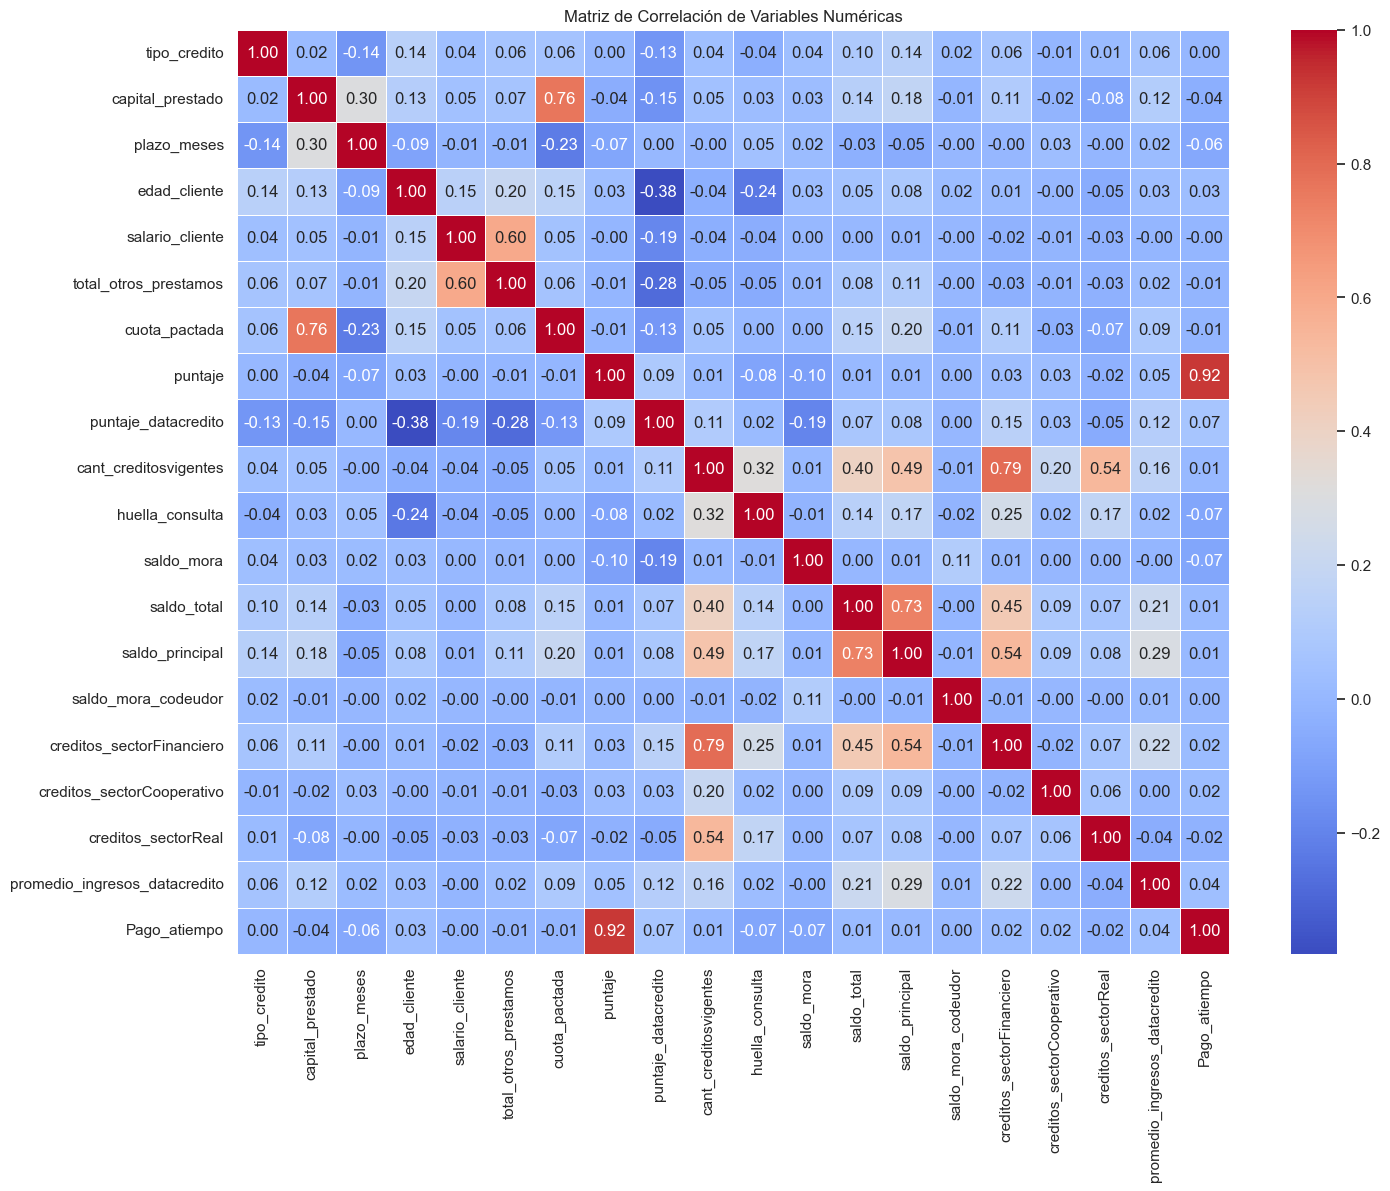

In [95]:
# Matriz de correlación para visualizar relaciones lineales entre variables numéricas.
# Matriz de Correlación
plt.figure(figsize=(16, 12))
correlation_matrix = df[variables_numericas].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


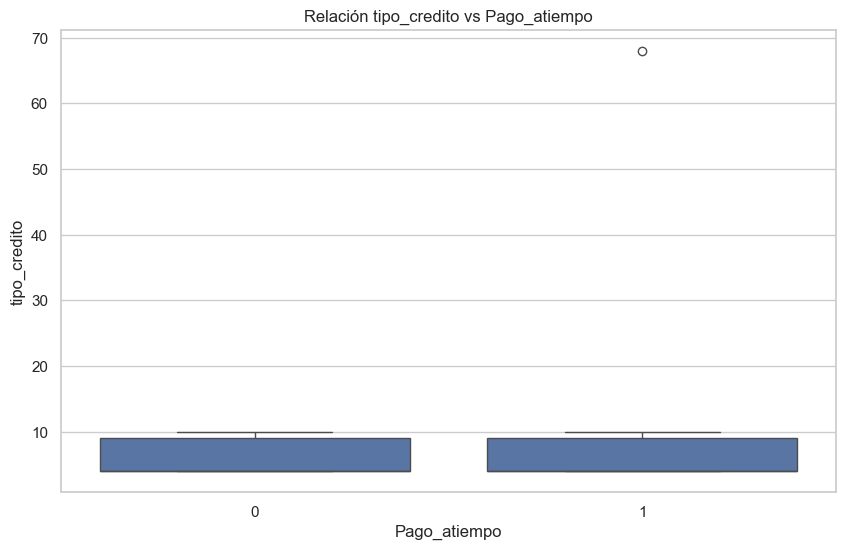

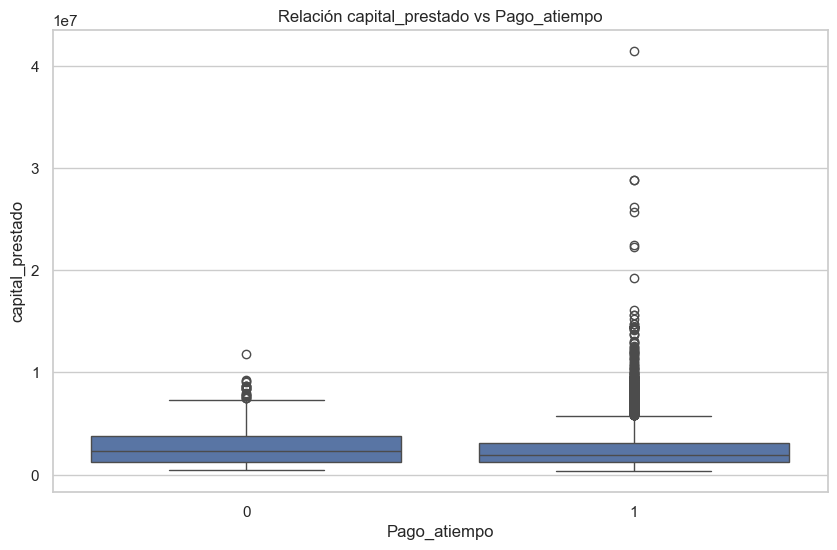

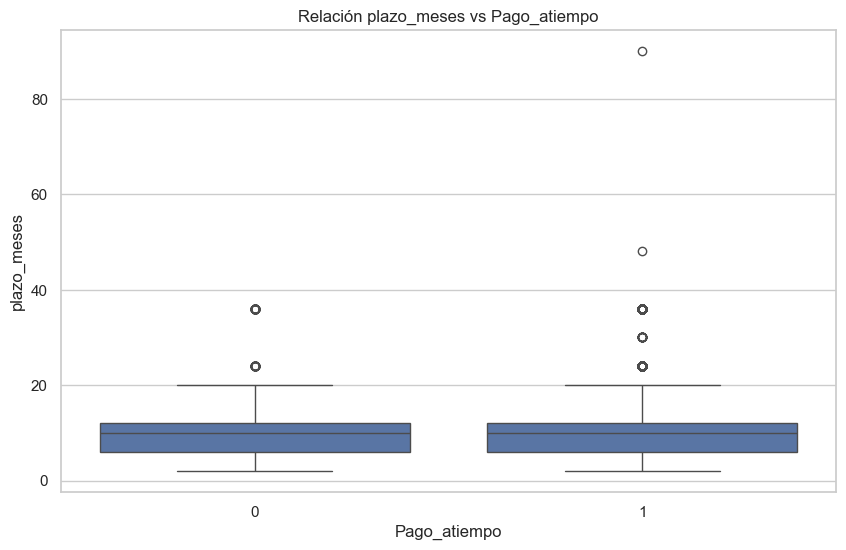

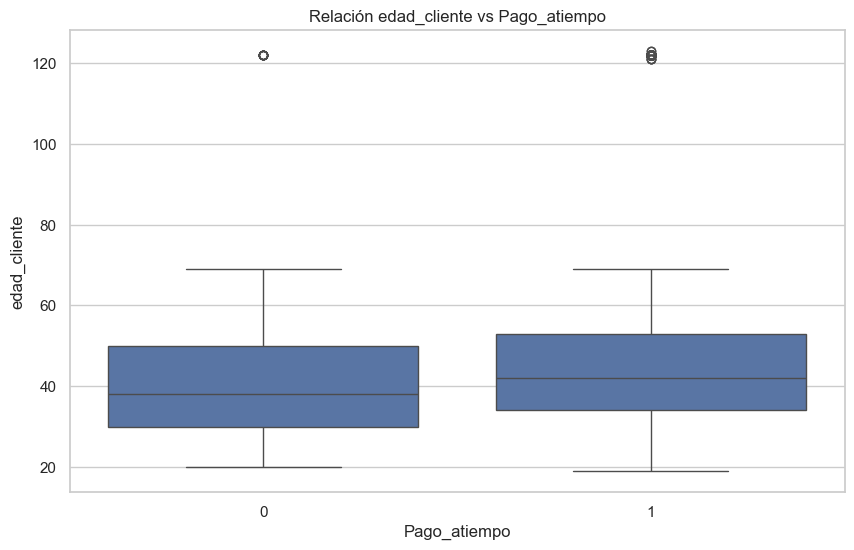

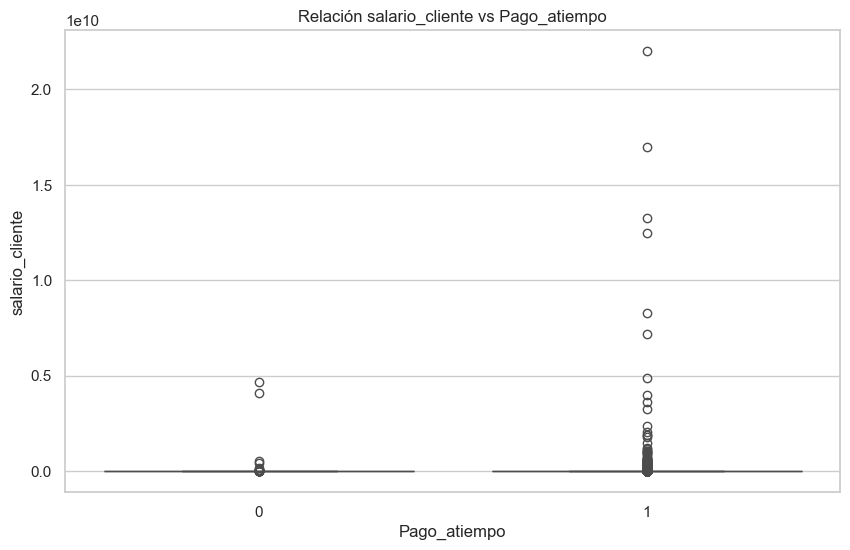

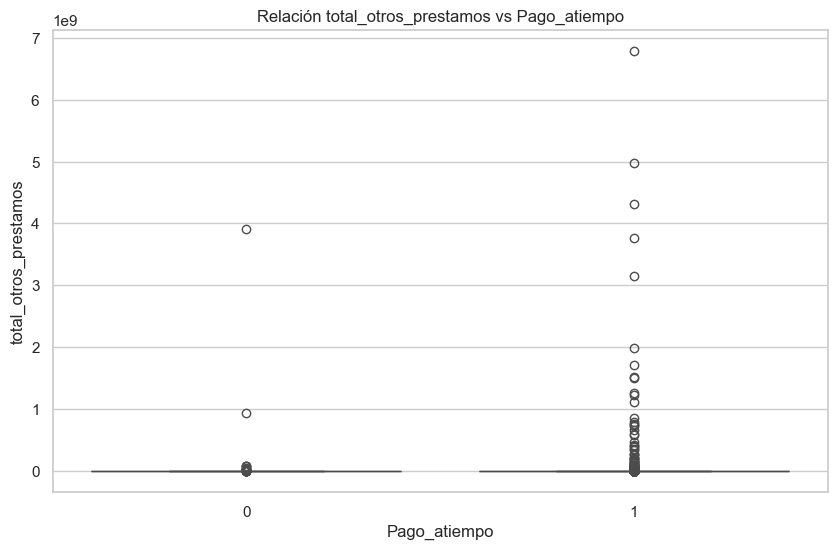

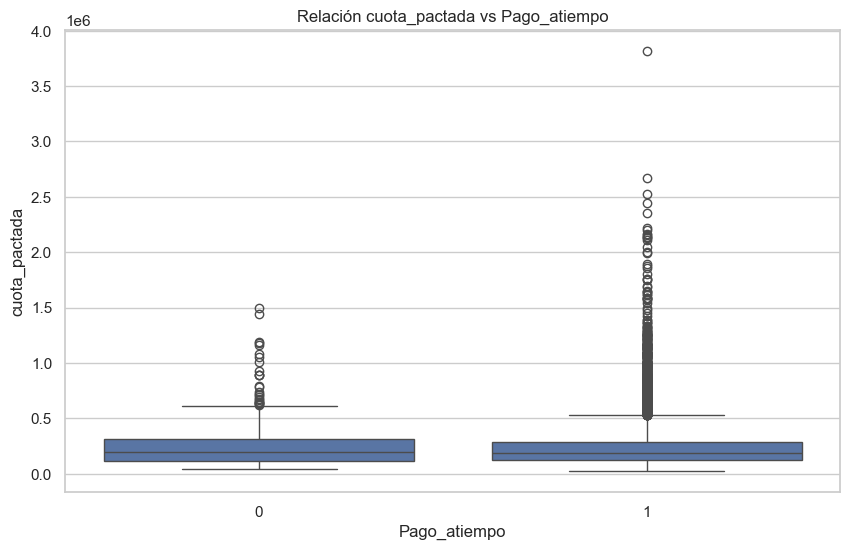

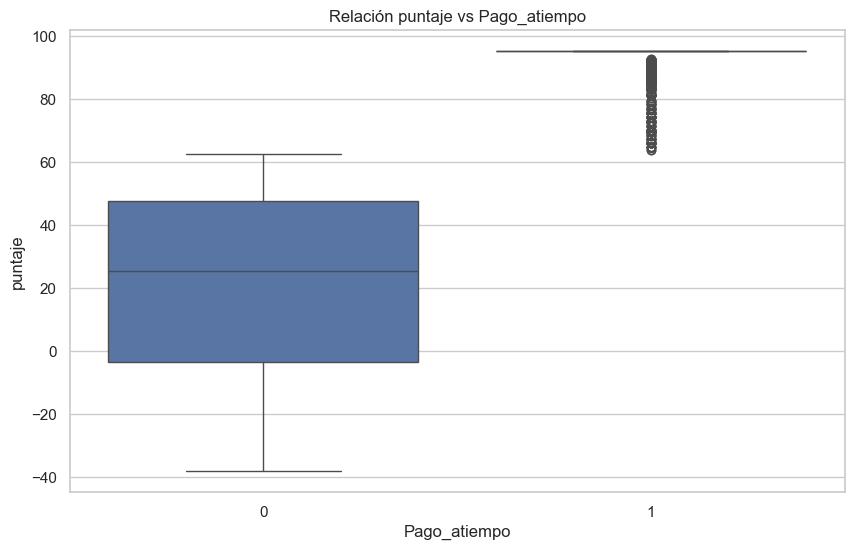

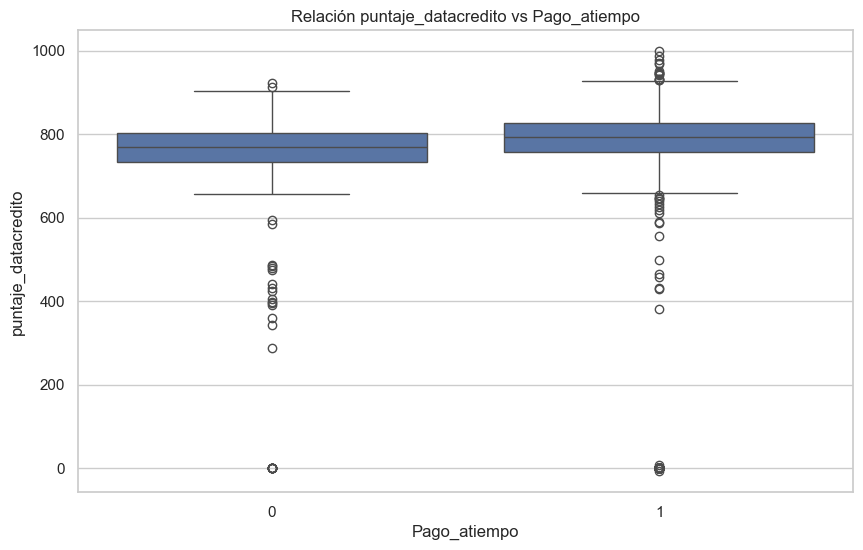

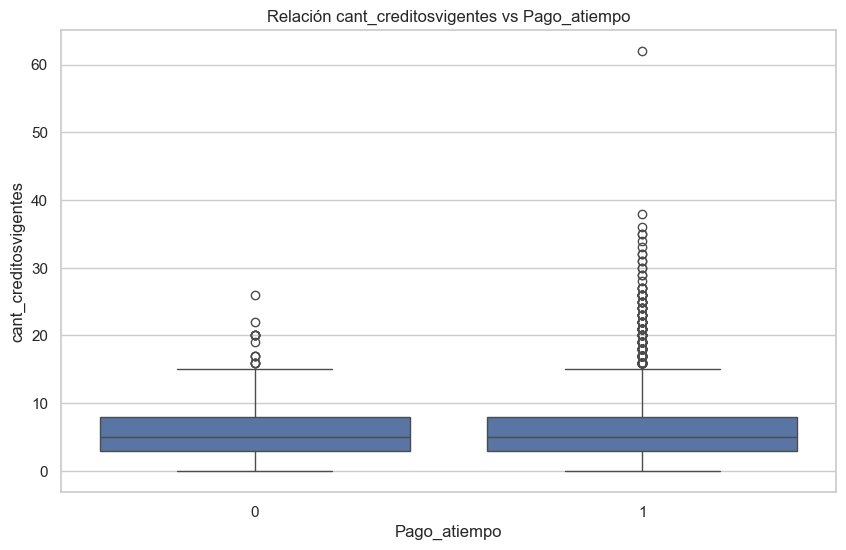

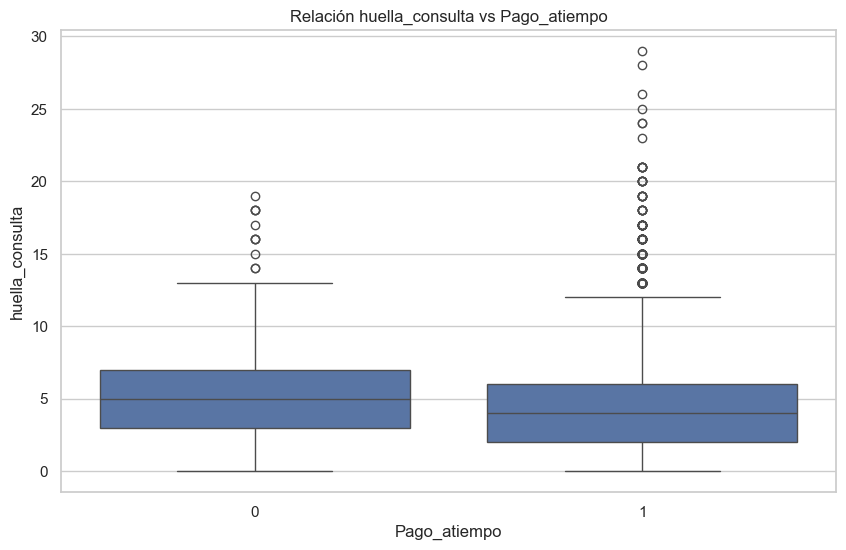

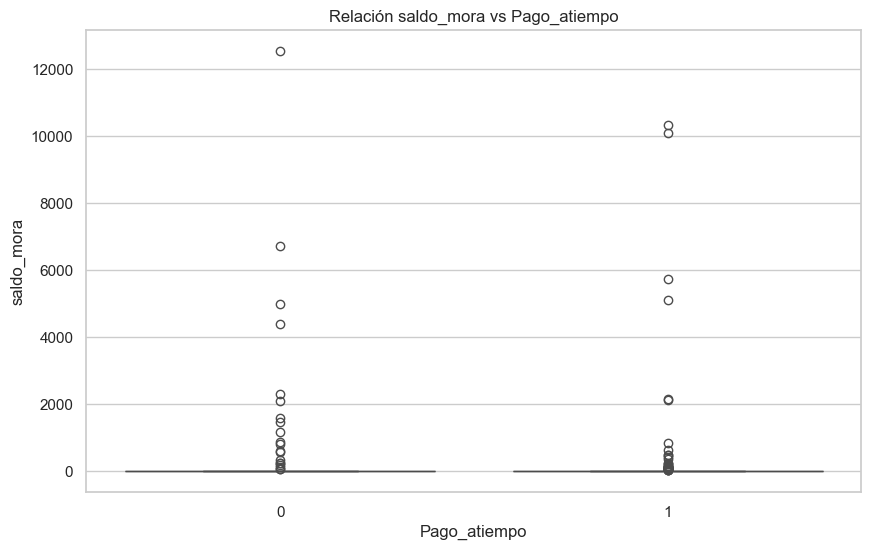

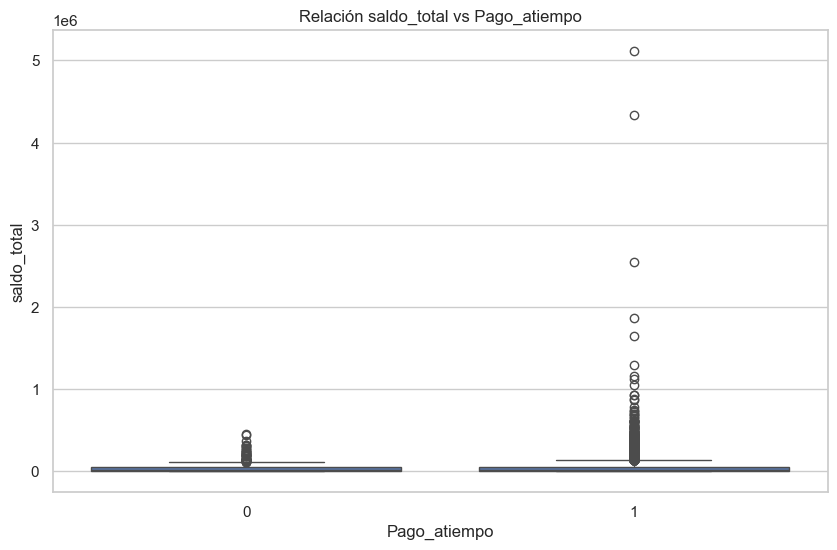

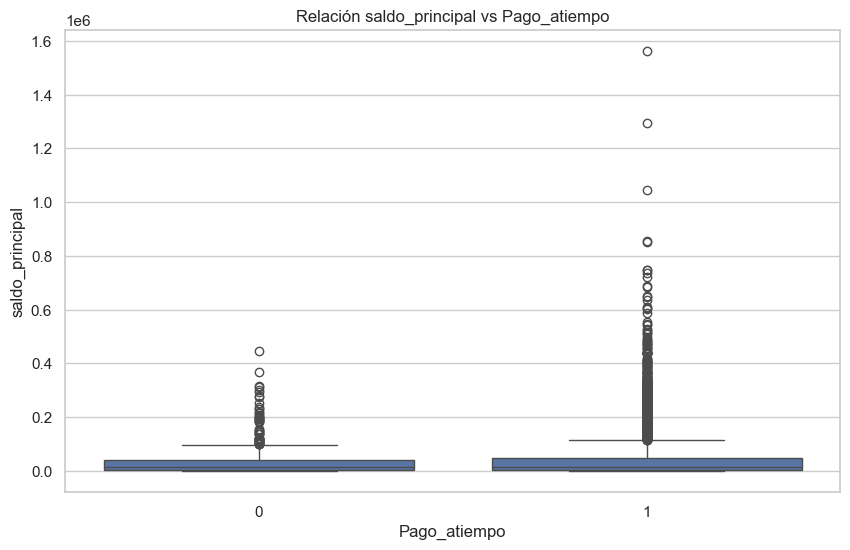

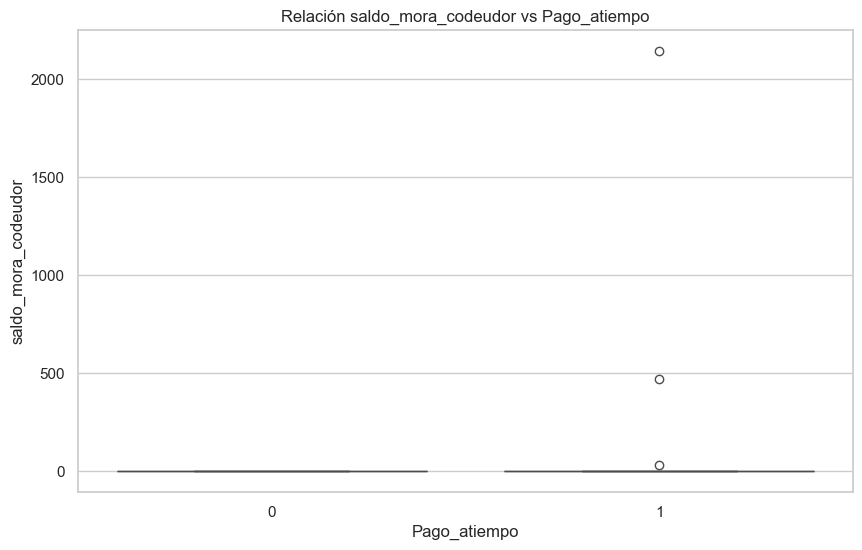

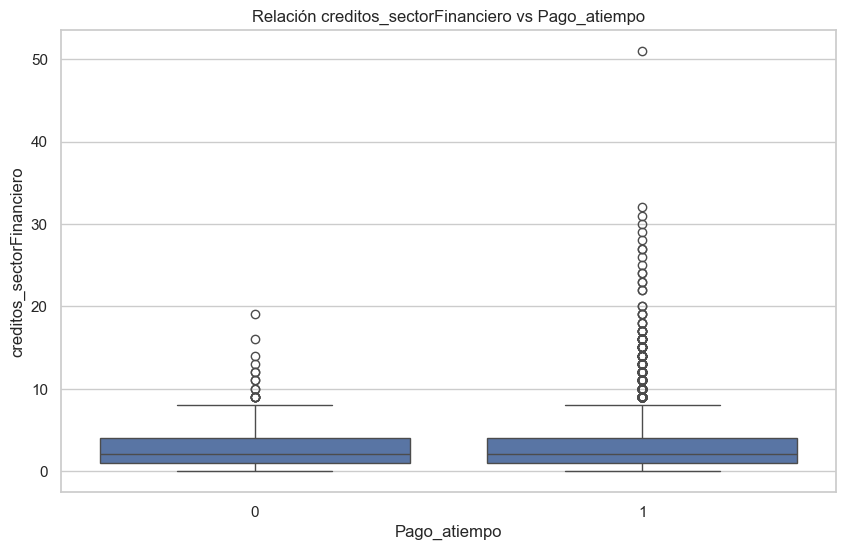

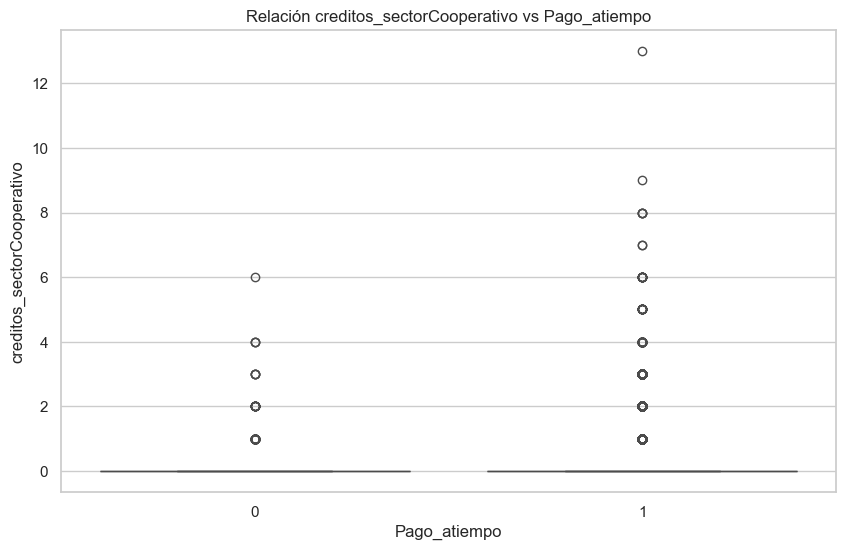

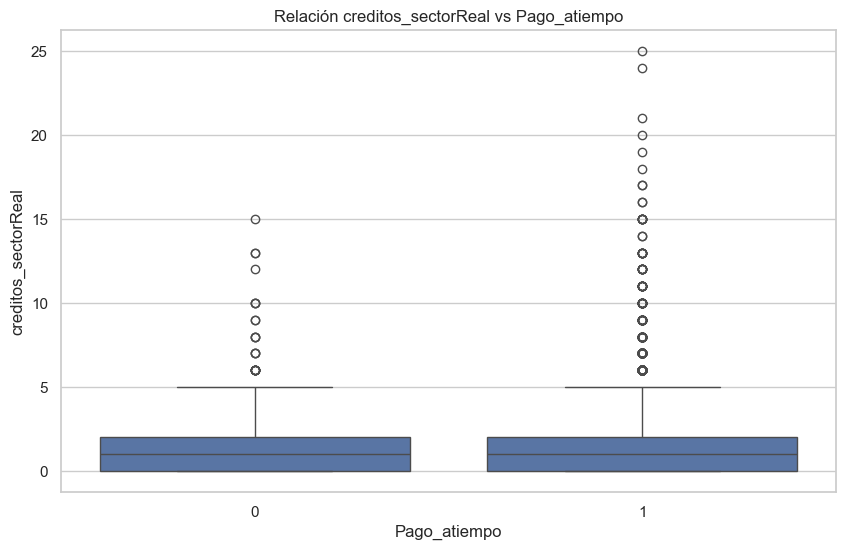

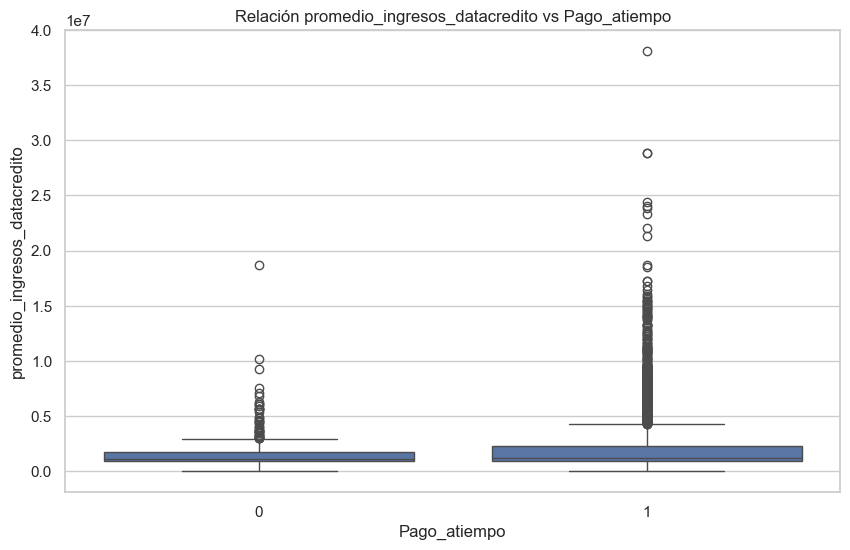

In [96]:
# Gráficos comparativos entre variables numéricas y la variable objetivo (Target).
# Relación Variables Numéricas vs Target (Pago_atiempo)
# Asumiendo target 'Pago_atiempo'
target = 'Pago_atiempo'

if target in df.columns:
    for col in variables_numericas:
        if col != target:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=target, y=col, data=df)
            plt.title(f'Relación {col} vs {target}')
            plt.show()


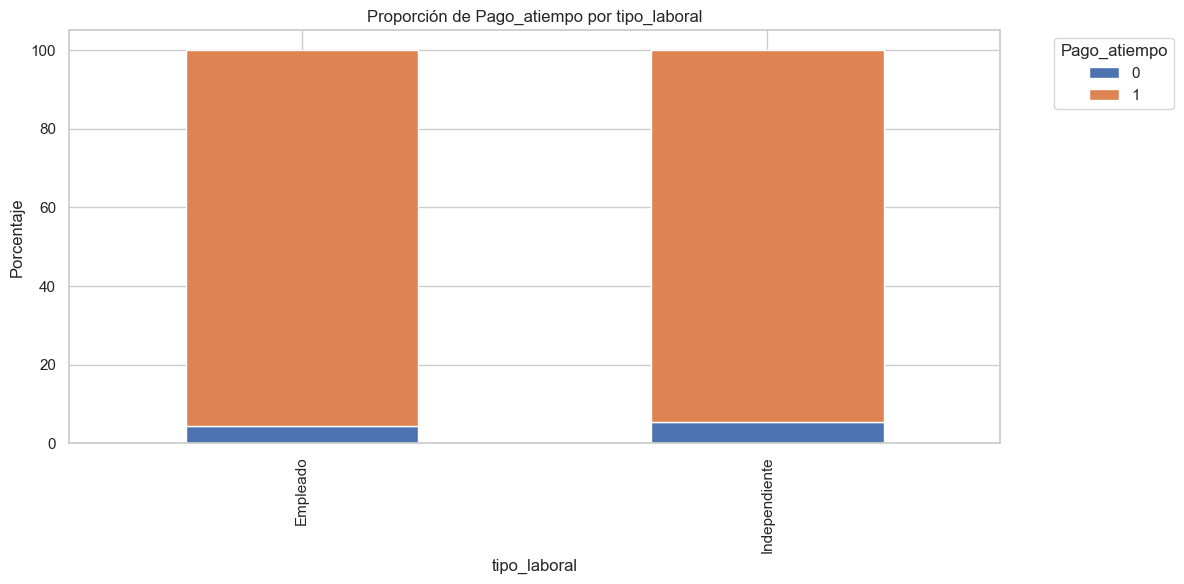

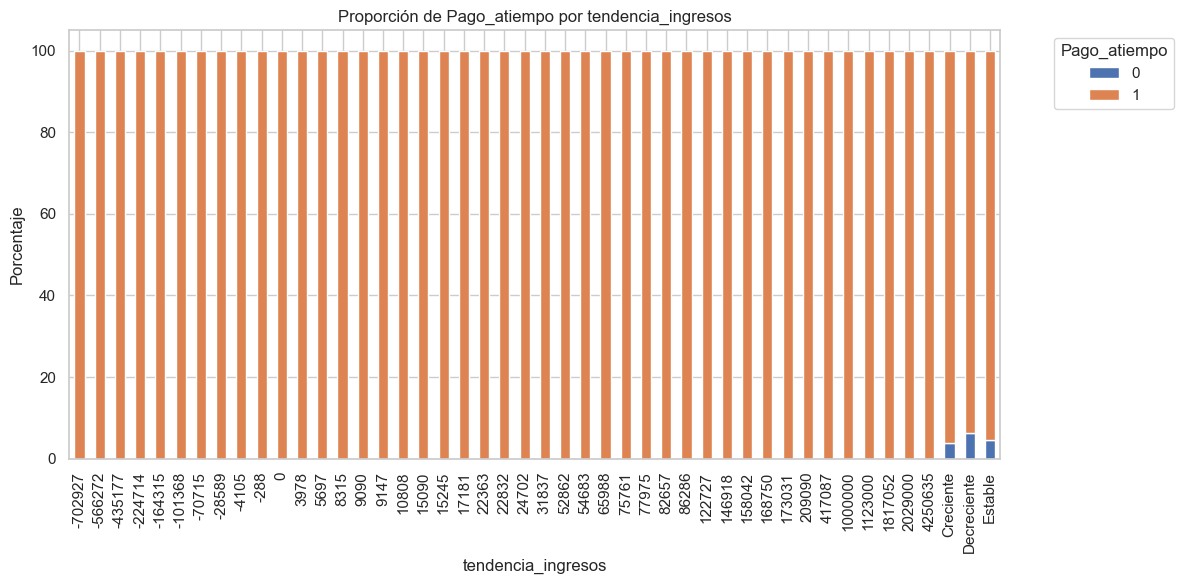

In [97]:
# Gráficos para evaluar la relación entre variables categóricas y el Target.
# Relación Variables Categóricas vs Target
if target in df.columns:
    for col in variables_categoricas:
        if df[col].nunique() < 50:
            crosstab = pd.crosstab(df[col], df[target], normalize='index') * 100
            crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))
            plt.title(f'Proporción de {target} por {col}')
            plt.ylabel('Porcentaje')
            plt.legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()


___
### **4. Análisis Multivariable y Conclusiones Preliminares**

- Pairplot para relaciones complejas
- Interpretaciones


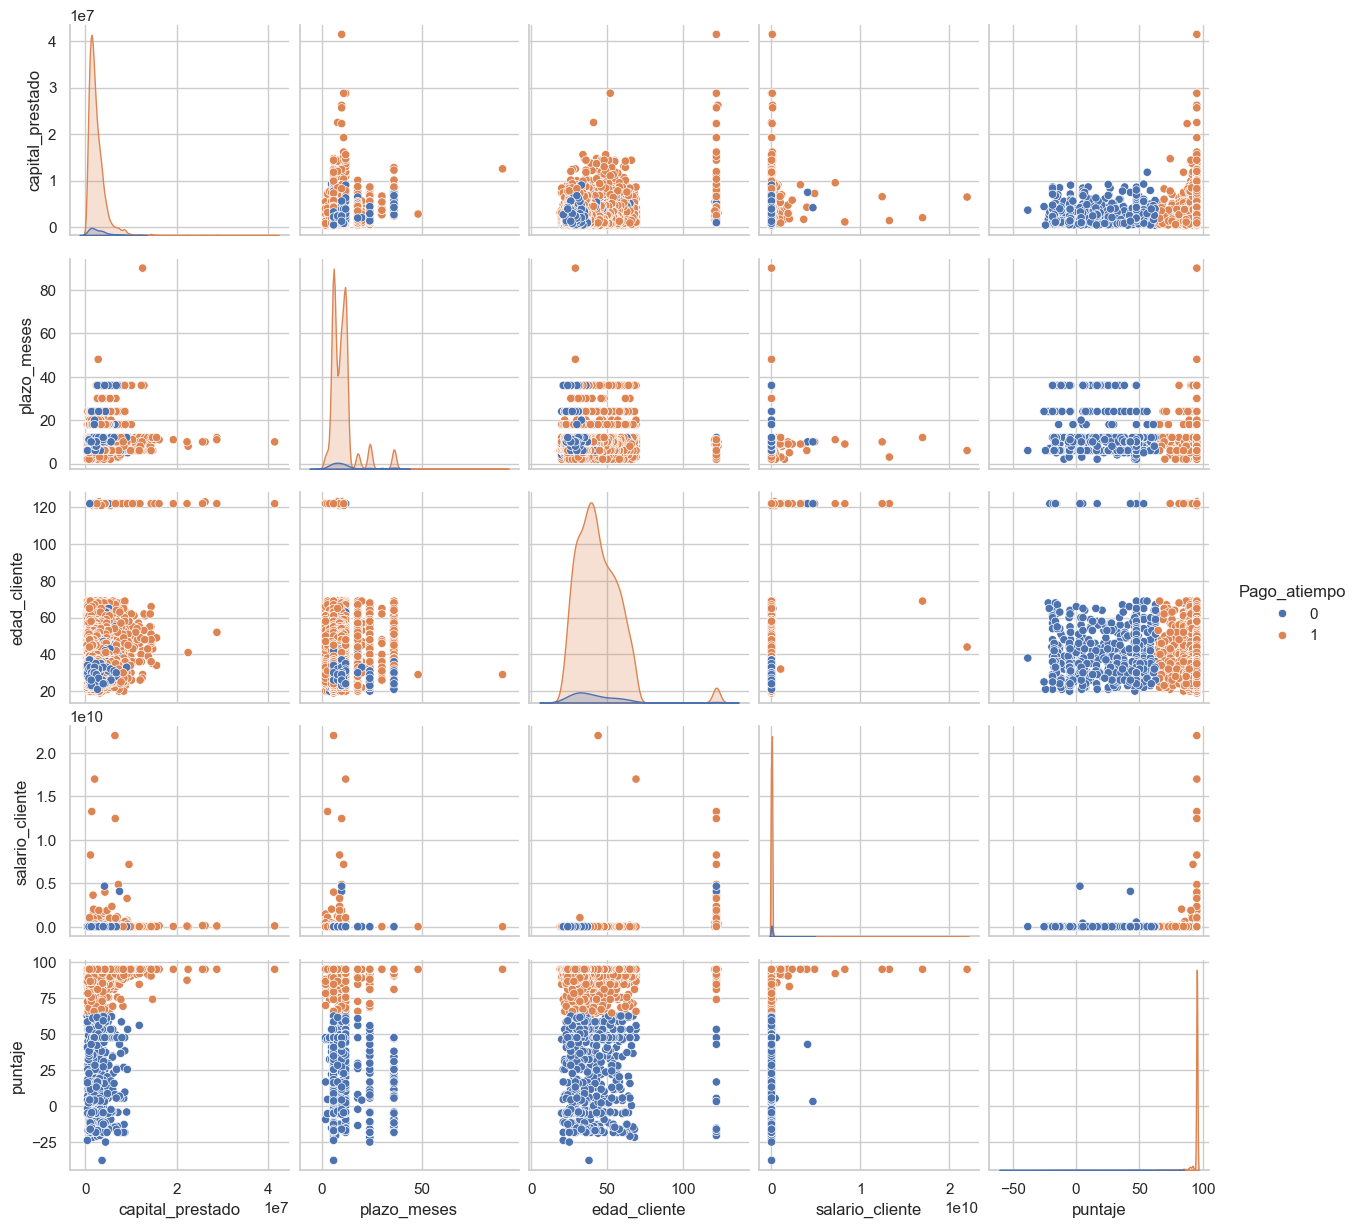

In [98]:
# Pairplot de variables seleccionadas para observar interacciones complejas.
# Pairplot (seleccionando variables clave para no sobrecargar)
cols_interes = ['capital_prestado', 'plazo_meses', 'edad_cliente', 'salario_cliente', 'puntaje']
if target in df.columns:
    cols_interes.append(target)

# Filtramos solo columnas que existen
cols_pairplot = [c for c in cols_interes if c in df.columns]

if len(cols_pairplot) > 1:
    sns.pairplot(df[cols_pairplot], hue=target if target in df.columns else None, diag_kind='kde')
    plt.show()

___
### **Conclusiones del Análisis Exploratorio de Datos (EDA)**

Tras realizar el análisis exploratorio, se destacan los siguientes hallazgos y recomendaciones para el preprocesamiento:

#### **1. Calidad de los Datos**
*   **Valores Nulos:** Se identificaron variables con un alto porcentaje de datos faltantes:
    *   `tendencia_ingresos` (~27%)
    *   `promedio_ingresos_datacredito` (~27%)
    *   También existen nulos en `saldo_mora_codeudor` (5.5%).
    *   **Acción:** Se requiere una estrategia de imputación (e.g., mediana/moda o categoría 'Desconocido') o evaluar si eliminar columnas con excesivos nulos.
*   **Inconsistencias:** La variable categórica `tendencia_ingresos` presenta valores 'sucio' (números como `0`, `8315`) mezclados con categorías válidas (`Creciente`, `Estable`).
    *   **Acción:** Es prioritario limpiar estos valores antes de usar la variable.
*   **Duplicados:** No se encontraron filas totalmente duplicadas.

#### **2. Análisis Univariado y Distribuciones**
*   **Variables Financieras:** Variables como `saldo_mora_codeudor`, `salario_cliente`, y `total_otros_prestamos` muestran una **asimetría extrema** (skewness > 30) y **curtosis muy alta**.
    *   **Interpretación:** Esto indica una fuerte concentración de datos en valores bajos y una "cola larga" de clientes con valores muy altos (outliers).
    *   **Acción:** Considerar transformaciones logarítmicas o escalado robusto para reducir el impacto de estos outliers en modelos sensibles.
*   **Perfiles:** La mayoría de los clientes tiene tipo laboral 'Empleado' y tendencia de ingresos 'Creciente'.

#### **3. Estrategia de Modelado**
*   Dada la disparidad de escalas y la presencia de outliers, algoritmos basados en árboles (Random Forest, Gradient Boosting) podrían comportarse mejor que modelos lineales, a menos que se traten rigurosamente los outliers.
*   Es necesario revisar la correlación de las variables financieras para evitar multicolinealidad.
